In [1]:
import fiftyone as fo
from fiftyone import ViewField as F
import glob
import numpy as np
from tidecv import TIDE, datasets
dataset = fo.load_dataset('RumexWeeds')

In [48]:
if 'yolox_s_rumexweeds_testset' not in dataset.list_evaluations():
    results_yolox_s_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolox_s_rumexweeds', gt_field='ground_truth_detections', classes=['rumex_obtusifolius', "rumex_crispus"], method='coco', classwise=False, compute_mAP=True, eval_key="yolox_s_rumexweeds_testset")
else:
    results_yolox_s_test = dataset.load_evaluation_results('yolox_s_rumexweeds_testset')

Evaluating detections...
 100% |███████████████| 1535/1535 [12.1s elapsed, 0s remaining, 129.4 samples/s]      
Performing IoU sweep...
 100% |███████████████| 1535/1535 [21.1s elapsed, 0s remaining, 79.9 samples/s]      


In [49]:
if "yolox_l_rumexweeds_testset" not in dataset.list_evaluations():
    results_yolox_l_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolox_l_rumexweeds', gt_field='ground_truth_detections', classes=['rumex_obtusifolius', "rumex_crispus"], classwise=False, method='coco', compute_mAP=True, eval_key="yolox_l_rumexweeds_testset")
else:
    results_yolox_l_test = dataset.load_evaluation_results('yolox_l_rumexweeds_testset')

Evaluating detections...
 100% |███████████████| 1535/1535 [8.7s elapsed, 0s remaining, 159.1 samples/s]      
Performing IoU sweep...
 100% |███████████████| 1535/1535 [13.1s elapsed, 0s remaining, 128.3 samples/s]      


In [50]:
if "yolox_dn53_rumexweeds_testset" not in dataset.list_evaluations():
    results_yolox_dn53_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolox_DarkNet53_rumexweeds', gt_field='ground_truth_detections', classes=['rumex_obtusifolius', "rumex_crispus"], classwise=False, method='coco', compute_mAP=True, eval_key="yolox_dn53_rumexweeds_testset")
else:
    results_yolox_dn53_test = dataset.load_evaluation_results('yolox_dn53_rumexweeds_testset')

Evaluating detections...
 100% |███████████████| 1535/1535 [10.3s elapsed, 0s remaining, 143.8 samples/s]      
Performing IoU sweep...
 100% |███████████████| 1535/1535 [16.9s elapsed, 0s remaining, 85.1 samples/s]      


In [51]:
if "yolor_p6_rumexweeds_testset" not in dataset.list_evaluations():
    results_yolor_p6_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolor_p6_1920', gt_field='ground_truth_detections', classes=['rumex_obtusifolius', "rumex_crispus"], classwise=False, method='coco', compute_mAP=True, eval_key="yolor_p6_rumexweeds_testset")
else:
    results_yolor_p6_test = dataset.load_evaluation_results("yolor_p6_rumexweeds_testset")

Evaluating detections...
 100% |███████████████| 1535/1535 [14.2s elapsed, 0s remaining, 74.7 samples/s]       
Performing IoU sweep...
 100% |███████████████| 1535/1535 [25.2s elapsed, 0s remaining, 40.7 samples/s]       


In [58]:
if "yolov5_l_rumexweeds_testset" not in dataset.list_evaluations():
    results_yolov5_l_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolov5_l', gt_field='ground_truth_detections', classes=['rumex_obtusifolius', "rumex_crispus"], classwise=False, method='coco', compute_mAP=True, eval_key="yolov5_l_rumexweeds_testset")
else:
    results_yolov5_l_test = dataset.load_evaluation_results("yolov5_l_rumexweeds_testset")

Evaluating detections...
 100% |███████████████| 1535/1535 [8.9s elapsed, 0s remaining, 155.6 samples/s]      
Performing IoU sweep...
 100% |███████████████| 1535/1535 [12.1s elapsed, 0s remaining, 131.5 samples/s]      


# Single class detectors

In [4]:
detection_fields_single = ["predictions_" + x + "_single" for x in ["faster_rcnn", "yolov4_csp", "yolov5_l", "yolox_DarkNet53_rumexweeds", "yolox_l_rumexweeds", "yolox_s_rumexweeds", "CenterNet_ctdet_coco-dla-1x"]]

results = []
for algorithm in detection_fields_single:
    if "_".join(algorithm.split('_')[1:]) not in dataset.list_evaluations():
        results.append(dataset.match_tags(['test']).evaluate_detections(algorithm, gt_field='ground_truth_detections_single', classes=["rumex"], method="coco", compute_mAP=True, eval_key="_".join(algorithm.split('_')[1:]).replace('-', '_')))


Evaluating detections...
 100% |███████████████| 1535/1535 [1.2m elapsed, 0s remaining, 19.8 samples/s]      
Performing IoU sweep...
 100% |███████████████| 1535/1535 [2.8m elapsed, 0s remaining, 9.8 samples/s]       


In [5]:
print(f"dataset : mAP")
evaluation_result_dict = {}
#Note that the non-single class detectors will only check against rumex obtusifolius, so the results are not directly comparable
#Correct for that and check the detectors trained on rumex obtusifolius on the single-class ground truth
#Did that - > remember it when comparing. 
for eval in dataset.list_evaluations():
    results = dataset.load_evaluation_results(eval)
    evaluation_result_dict[eval] = results.mAP()
dict(sorted(evaluation_result_dict.items(), key=lambda item: item[1]))

dataset : mAP


{'yolor_p6_rumexweeds_testset': 0.047011589089117,
 'yolox_l_rumexweeds_testset': 0.06903270531569757,
 'yolox_s_rumexweeds_testset': 0.07477518002583516,
 'yolox_dn53_rumexweeds_testset': 0.07609254276179922,
 'faster_rcnn_single': 0.07672098729963332,
 'yolov5_l_rumexweeds_testset': 0.09785876012919267,
 'yolox_s_rumexweeds_single': 0.10913893545574116,
 'yolox_DarkNet53_rumexweeds_single': 0.11527684721651418,
 'yolov5_l_single': 0.12167222906852632,
 'yolox_l_rumexweeds_single': 0.12215071800904133,
 'CenterNet_ctdet_coco_dla_1x_single': 0.1375983375178747,
 'yolov4_csp_single': 0.20594419255205468}

In [84]:
#Export with rumex crispus class to compare with the single-class dataset. Might be unfair either way
# Either: don't include rumex crispus as algorithm wasn't trained on it
# Or: include rumex crispus as it is in fact part of ground truth and underrepresented (so the influence should be small)
rumex_obs_only_view = dataset.filter_labels('ground_truth_detections', F("label").is_in(["rumex_obtusifolius", "rumex_crispus"]), only_matches=False)
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolox_l_rumexweeds", labels_path="yolox_l_rumexweeds_preds.json")
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolox_s_rumexweeds", labels_path="yolox_s_rumexweeds_preds.json")
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolox_DarkNet53_rumexweeds", labels_path="yolox_DarkNet53_rumexweeds_preds.json")
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolor_p6_1920", labels_path="yolor_p6_1920_preds.json")
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolov5_l", labels_path="yolor_v5_l_preds.json")

 100% |███████████████| 1535/1535 [2.4m elapsed, 0s remaining, 5.0 samples/s]       
 100% |███████████████| 1535/1535 [2.3m elapsed, 0s remaining, 8.8 samples/s]       
 100% |███████████████| 1535/1535 [2.2m elapsed, 0s remaining, 10.2 samples/s]      
 100% |███████████████| 1535/1535 [2.3m elapsed, 0s remaining, 11.1 samples/s]      
 100% |███████████████| 1535/1535 [2.2m elapsed, 0s remaining, 12.0 samples/s]      


In [6]:
dataset.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, classes=["rumex"], label_field="predictions_yolox_l_rumexweeds_single", labels_path="yolox_l_rumexweeds_preds_single.json")
dataset.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, classes=["rumex"], label_field="predictions_yolox_s_rumexweeds_single", labels_path="yolox_s_rumexweeds_preds_single.json")
dataset.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, classes=["rumex"], label_field="predictions_yolox_DarkNet53_rumexweeds_single", labels_path="yolox_DarkNet53_rumexweeds_preds_single.json")
dataset.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, classes=["rumex"], label_field="predictions_faster_rcnn_single", labels_path="faster_rcnn_preds_single.json")
dataset.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, classes=["rumex"], label_field="predictions_yolov4_csp_single", labels_path="yolov4_csp_preds_single.json")
dataset.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, classes=["rumex"], label_field="predictions_yolov5_l_single", labels_path="yolov5_l_preds_single.json")
dataset.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, classes=["rumex"], label_field="predictions_CenterNet_ctdet_coco-dla-1x_single", labels_path="CenterNet_ctdet_coco-dla-1x_preds_single.json")

 100% |███████████████| 1535/1535 [2.9m elapsed, 0s remaining, 8.8 samples/s]      
 100% |███████████████| 1535/1535 [3.4m elapsed, 0s remaining, 7.6 samples/s]      
 100% |███████████████| 1535/1535 [3.4m elapsed, 0s remaining, 8.2 samples/s]      
 100% |███████████████| 1535/1535 [3.5m elapsed, 0s remaining, 7.7 samples/s]      
 100% |███████████████| 1535/1535 [2.9m elapsed, 0s remaining, 8.0 samples/s]      
 100% |███████████████| 1535/1535 [3.0m elapsed, 0s remaining, 8.2 samples/s]       
 100% |███████████████| 1535/1535 [3.1m elapsed, 0s remaining, 8.6 samples/s]      


In [85]:
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, classes=["rumex_obtusifolius", "rumex_crispus"], label_field="ground_truth_detections", labels_path="ground_truth_detections.json")
dataset.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, classes=["rumex"], label_field="ground_truth_detections_single", labels_path="ground_truth_detections_single.json")

 100% |███████████████| 1535/1535 [2.2m elapsed, 0s remaining, 10.5 samples/s]      
 100% |███████████████| 1535/1535 [2.2m elapsed, 0s remaining, 11.9 samples/s]      


-- yolor_p6_1920_preds --

bbox AP @ 50: 2.99

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP    19.71     5.16     0.00     0.00     8.69     0.22  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP      23.25       7.81  

-- yolor_v5_l_preds --

bbox AP @ 50: 13.22

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     7.30     6.13     0.00     0.00     4.27     7.89  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP      11.03      38.79  

-- yolox_DarkNet53_rumexweeds_preds --

bbox AP @ 50: 5.53

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   d

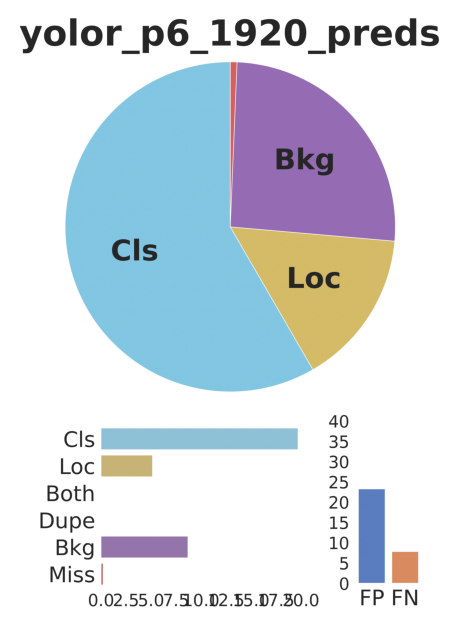

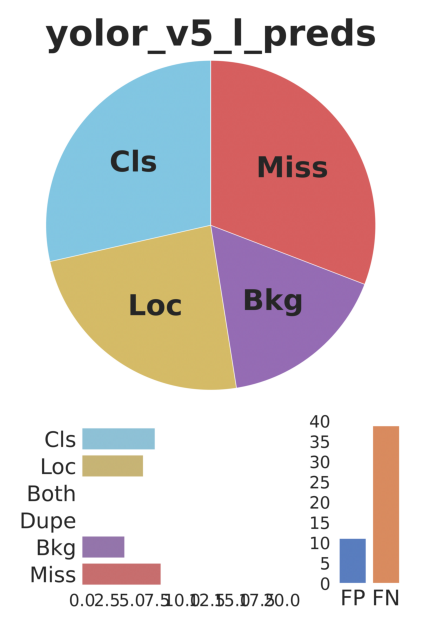

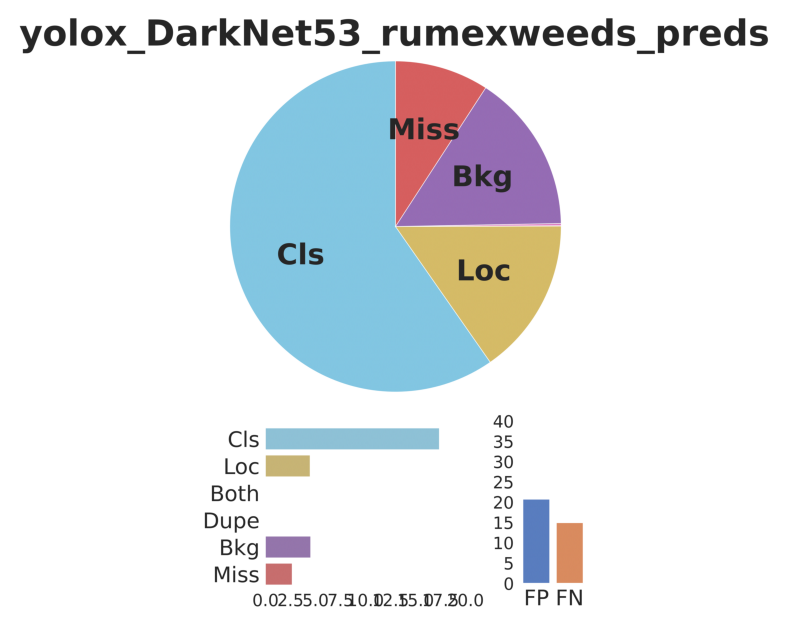

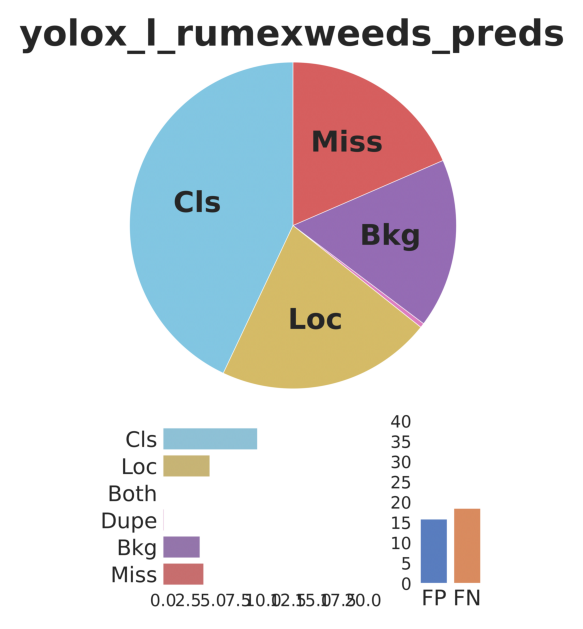

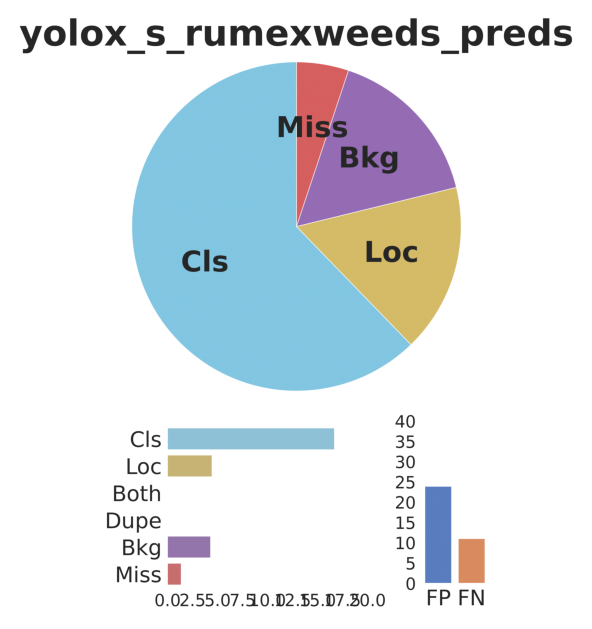

In [86]:
tide = TIDE()
for pred_file in glob.glob('*preds.json'):
    tide.evaluate(datasets.COCO("ground_truth_detections.json", "RumexWeeds_test"), datasets.COCO(pred_file), mode=TIDE.BOX)

tide.summarize()
tide.plot()

In [7]:
tide1 = TIDE()
for pred_file in glob.glob('*preds_single.json'):
    tide1.evaluate(datasets.COCO("ground_truth_detections_single.json", "RumexWeeds_testsingle"), datasets.COCO(pred_file), mode=TIDE.BOX)

tide1.summarize()
#tide1.plot()

-- CenterNet_ctdet_coco-dla-1x_preds_single --

bbox AP @ 50: 1.38

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     0.00     1.92     0.00     0.00    14.44     0.13  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP      59.02       0.90  

-- faster_rcnn_preds_single --

bbox AP @ 50: 0.07

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     0.00     0.06     0.00     0.00     7.91     0.31  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP      13.79       0.44  

-- yolov4_csp_preds_single --

bbox AP @ 50: 4.32

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-----------------------------------------------

In [10]:
session = fo.Session(dataset=dataset, auto=False)

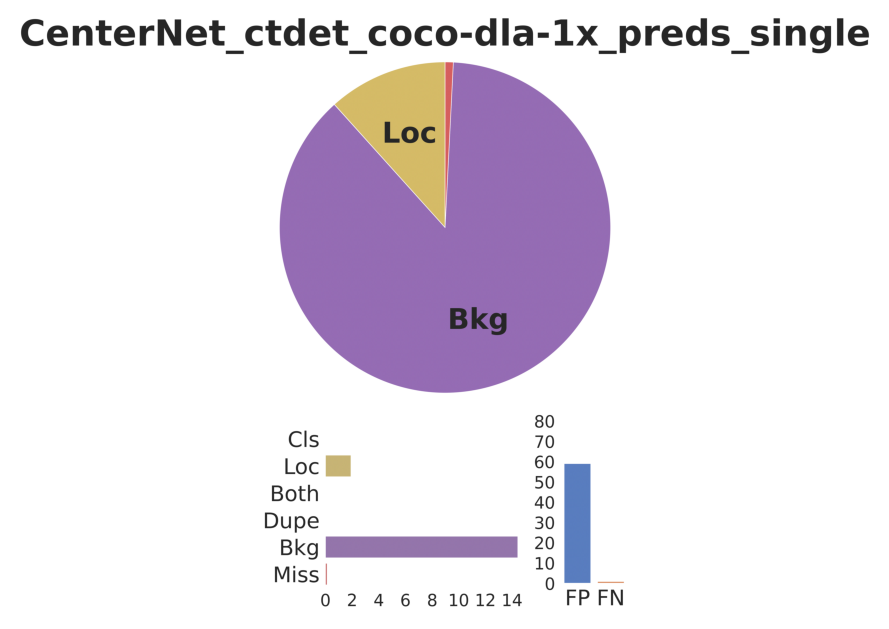

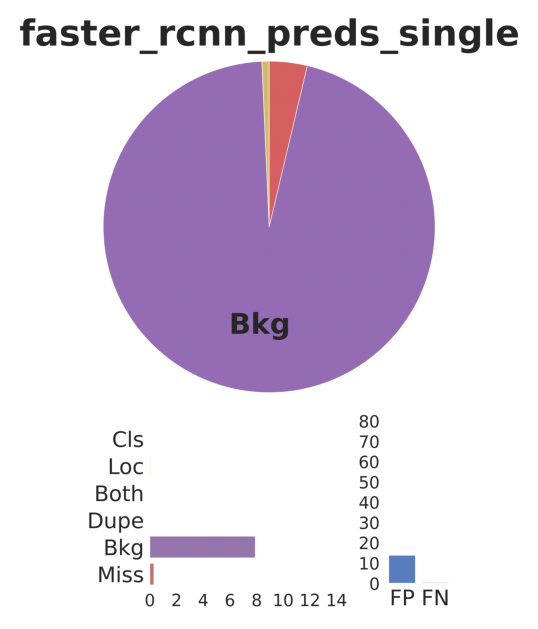

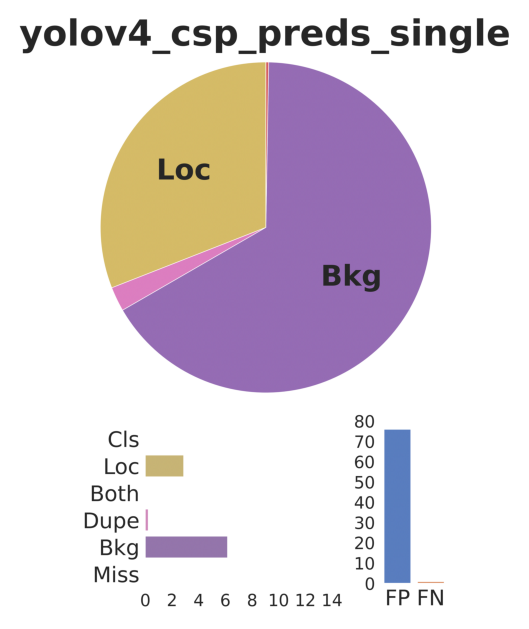

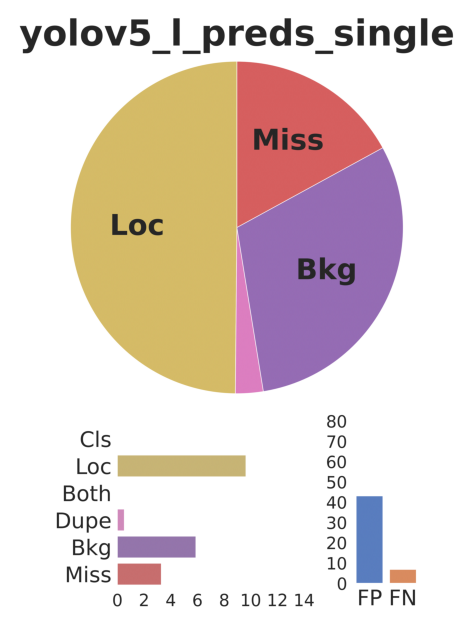

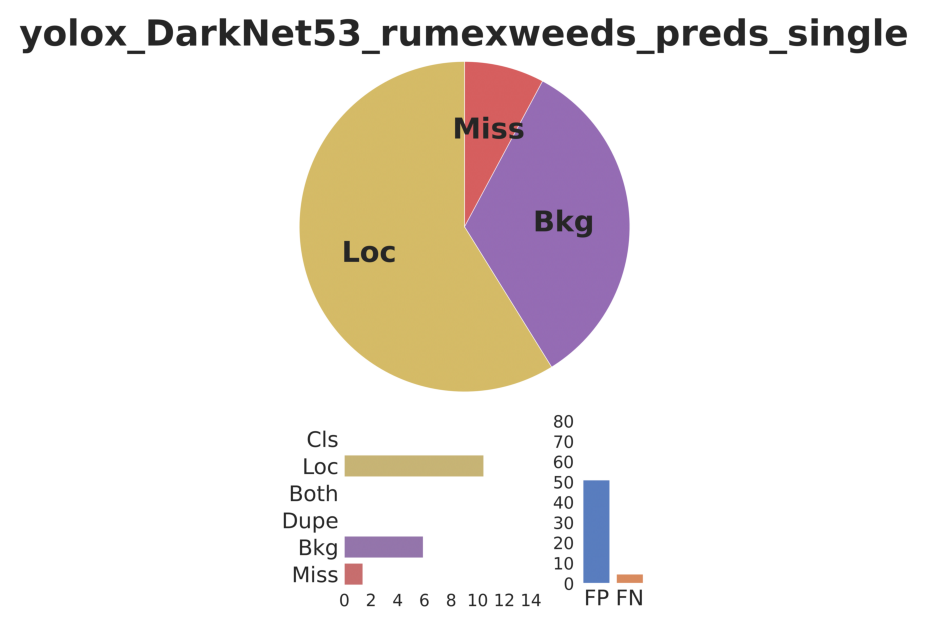

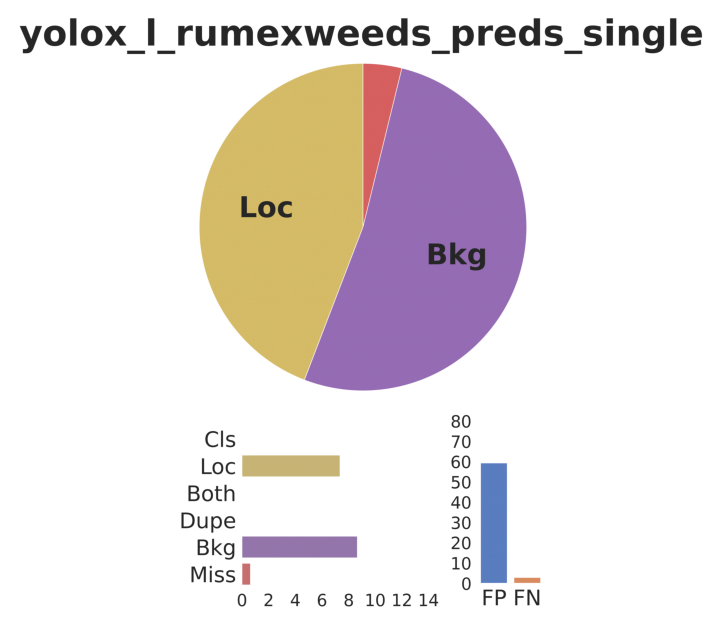

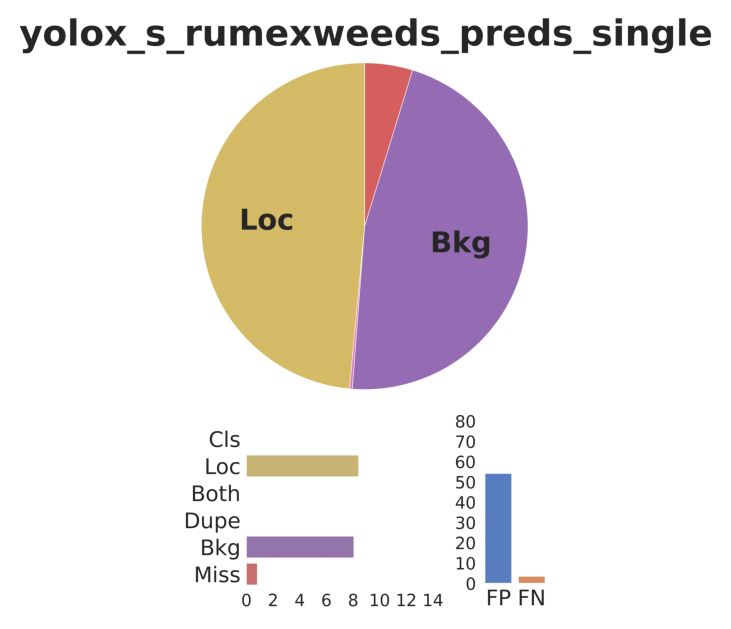

In [8]:
tide1.plot()

## Calculate the IoU between the different confidence threshold variants
IoU close to 1 implies that the higher confidence threshold in the YOLOx framework just has a filtering effect, not an overall altering effect
### YOLOX DN 53

In [40]:
def iou(bb1, bb2):
    """
    Calculates the IoU of two bounding boxes (FiftyOne format)

    Parameters
    -----------
    bb1: list of 4 floats, [<top-left-x>, <top-left-y>, <width>, <height>]
    bb2: list of 4 floats, [<top-left-x>, <top-left-y>, <width>, <height>]

    Returns
    ------
    iou: float between 0 and 1
    """
    assert isinstance(bb1, list), "must be list"
    assert isinstance(bb2, list), "Must be List"
    assert len(bb1) > 0, "Must contain detections"
    assert len(bb2) > 0, "Must contain detections"
    ymax1 = bb1[1] + bb1[3]
    ymax2 = bb2[1] + bb2[3]
    xmax1 = bb1[0] + bb1[2]
    xmax2 = bb2[0] + bb2[2]
    xmin1 = bb1[0]
    xmin2 = bb2[0]
    ymin1 = bb1[1]
    ymin2 = bb2[1]
    
    if max(xmin1, xmin2) > min(xmax1, xmax2) or max(ymin1 ,ymin2) > min(ymax1, ymax2):
        return 0, 0, 0
    union = (max(ymax1, ymax2) - min(ymin1, ymin2)) * \
            (max(xmax1, xmax2) - min(xmin1, xmin2)) - \
            (abs(ymax1 - ymax2) * abs(xmin1 - xmin2)) - \
            (abs(ymin2 - ymin1)* abs(xmax2 - xmax1))
    intersection = (max(ymin1, ymin2) - min(ymax1, ymax2)) * \
                    (max(xmin1, xmin2) - min(xmax1, xmax2))
    
    return intersection / union, intersection, union

bboxes_low_conf = dataset.values('predictions_yolox_DarkNet53_rumexweeds.detections.bounding_box')
bboxes_high_conf = dataset.values('predictions_yolox_DarkNet53_rumexweeds_testconf_0-25.detections.bounding_box')

high_conf_low_conf_maxious = []
for x,y in zip(bboxes_low_conf, bboxes_high_conf):
    ious = []
    for xx in x:
        for yy in y:
            ious.append(iou(xx,yy)[0]) 
    high_conf_low_conf_maxious.append(max(ious))

print(min(high_conf_low_conf_maxious))
print(max(high_conf_low_conf_maxious))
print(np.mean(high_conf_low_conf_maxious))




ValueError: Field 'predictions_yolox_DarkNet53_rumexweeds_testconf_0-25' does not exist on collection 'RumexWeeds'

In [35]:
bboxes_low_conf = dataset.values('predictions_yolox_l_rumexweeds.detections.bounding_box')
bboxes_high_conf = dataset.values('predictions_yolox_l_rumexweeds_testconf_0-25.detections.bounding_box')
high_conf_low_conf_maxious = []
for x,y in zip(bboxes_low_conf, bboxes_high_conf):
    ious = []
    for xx in x:
        for yy in y:
            ious.append(iou(xx,yy)) 
    if len(ious) > 0:
        high_conf_low_conf_maxious.append(max(ious))

if len(high_conf_low_conf_maxious) > 0:
    print(min(high_conf_low_conf_maxious))
    print(max(high_conf_low_conf_maxious))
    print(np.mean(high_conf_low_conf_maxious))


In [38]:
bboxes_low_conf = dataset.values('predictions_yolox_s_rumexweeds.detections.bounding_box')
bboxes_high_conf = dataset.values('predictions_yolox_s_rumexweeds_testconf_0-25.detections.bounding_box')
high_conf_low_conf_maxious = []
for x,y in zip(bboxes_low_conf, bboxes_high_conf):
    ious = []
    for xx in x:
        for yy in y:
            ious.append(iou(xx,yy)[0])
    if len(ious) > 0:
        high_conf_low_conf_maxious.append(max(ious))

if len(high_conf_low_conf_maxious) > 0:
    print(min(high_conf_low_conf_maxious))
    print(max(high_conf_low_conf_maxious))
    print(np.mean(high_conf_low_conf_maxious))


0.7278860881507293
0.9997704209677131
0.9927972620701635


In [42]:
bboxes_low_conf = dataset.values('predictions_yolor_p6_1920.detections.bounding_box')
bboxes_high_conf = dataset.values('predictions_yolor_p6_1920_025_045.detections.bounding_box')
print(len(bboxes_high_conf), len(bboxes_low_conf))
high_conf_low_conf_maxious = []
for x,y in zip(bboxes_low_conf, bboxes_high_conf):
    ious = []
    try:
        for xx in x:
            for yy in y:
                ious.append(iou(xx,yy)[0])
        if len(ious) > 0:
            high_conf_low_conf_maxious.append(max(ious))
    except Exception as e:
        pass

if len(high_conf_low_conf_maxious) > 0:
    print(min(high_conf_low_conf_maxious))
    print(max(high_conf_low_conf_maxious))
    print(np.mean(high_conf_low_conf_maxious))

5510 5510
0.9075221064631179
1.0
0.9999130251674807


In [2]:
session = fo.Session(dataset=dataset, auto=False)